In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
print(dados.head(3))

   unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577


Renomeando colunas

In [2]:
novo_nome_colunas = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}
dados = dados.rename(columns=novo_nome_colunas)
print(dados.head(3))

   nao_finalizado  horas_esperadas  preco
0               1               26    192
1               1               88   9015
2               1               89   2577


Tratativa de dados:

    Adicionar a coluna 'finalizados' como sendo o contrário da 'nao-finalizados'

In [3]:
troca = {
    0:1,
    1:0
}
dados['finalizados'] = dados.nao_finalizado.map(troca)
dados.head()
#dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


    Gráficos

Grafico geral Horas x Preço, plotando os finalizados


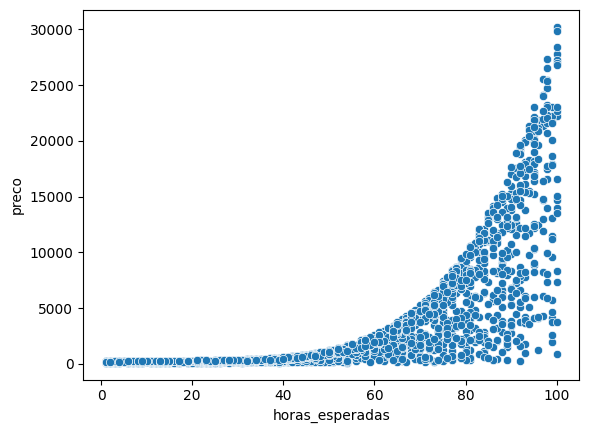

In [4]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)
print('Grafico geral Horas x Preço, plotando os finalizados')

Grafico geral Horas x Preço, plotando os finalizados COLORIDOS


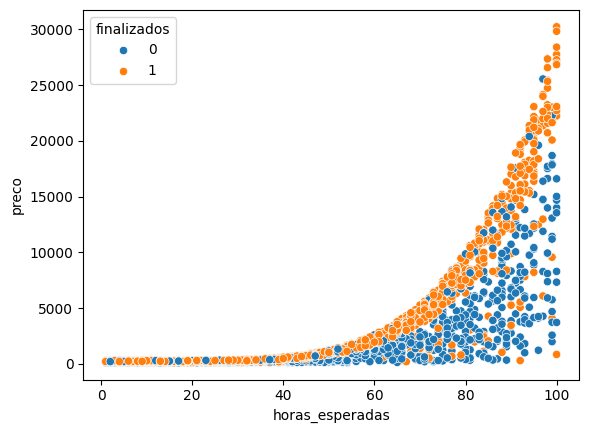

In [5]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue='finalizados')
print('Grafico geral Horas x Preço, plotando os finalizados COLORIDOS')

Grafico geral Horas x Preço, plotando os finalizados. 
 Formato RELATIVO


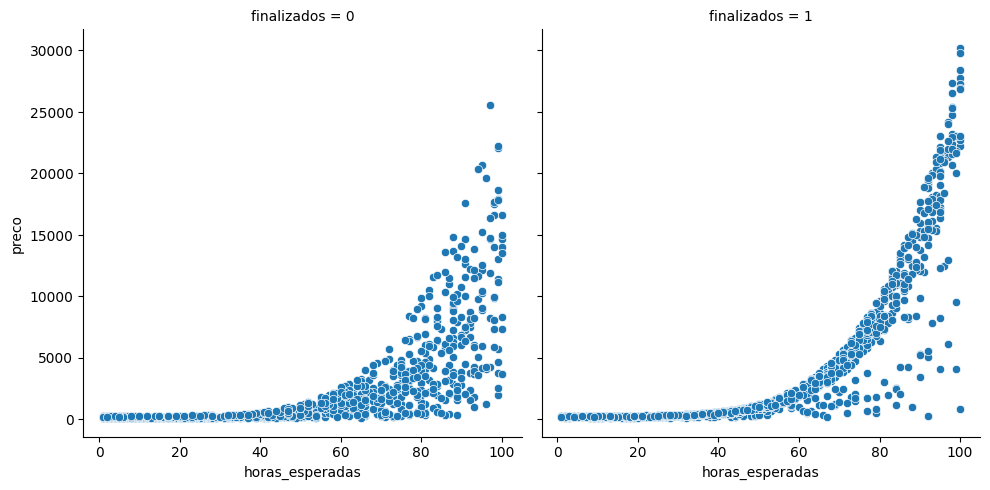

In [6]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, col='finalizados')
print('Grafico geral Horas x Preço, plotando os finalizados.','\n',
'Formato RELATIVO'
)

Grafico geral Horas x Preço, plotando os finalizados. 
 Formato RELATIVO e COLORIDO


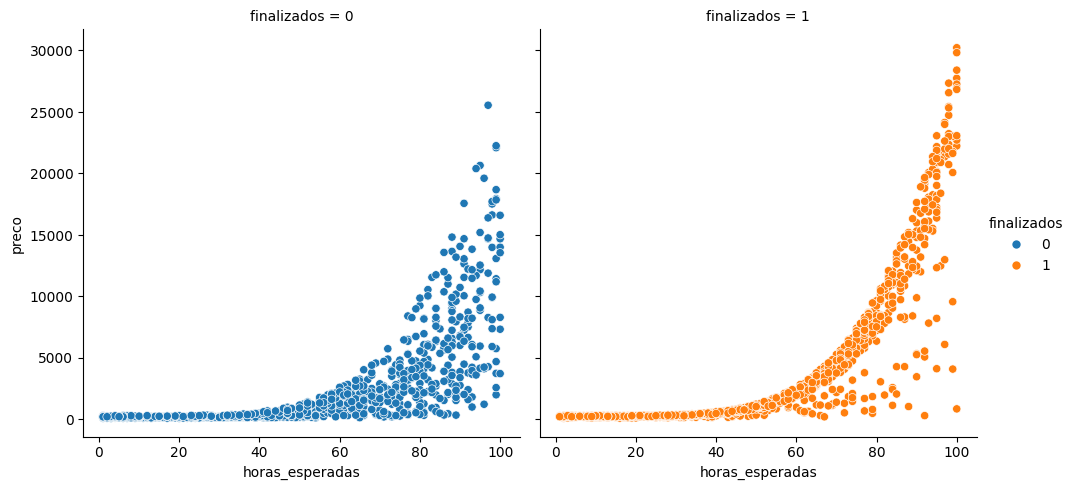

In [7]:
sns.relplot(
    x="horas_esperadas", y="preco", data=dados, col='finalizados', hue='finalizados'
)
print('Grafico geral Horas x Preço, plotando os finalizados.','\n',
'Formato RELATIVO e COLORIDO'
)

Separar as Features ("características") e Classe.

    Sendo x: Features ("características")
    Sendo y: Classificação ("Classe")

In [8]:
x = dados[['horas_esperadas','preco']]
y = dados['finalizados']

In [9]:
SEED = 20
np.random.seed(SEED) ### Se a Lib de dados usar o np como base. Nesse caso a sklearn usa.

treino_x, teste_x, treino_y, teste_y = train_test_split(
    x, y, test_size = 0.25, stratify=y
)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 51.48%


c:\Users\bmnet\OneDrive\Área de Trabalho\Diogo\MEI\repositorios\projetos_pessoais\data-analysis-projetos-concluidos\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\bmnet\OneDrive\Área de Trabalho\Diogo\MEI\repositorios\projetos_pessoais\data-analysis-projetos-concluidos\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    Algorítimo de Baseline (Previsões de Base)

In [10]:
base_line = np.ones(540)
acuracia_base_line = accuracy_score(teste_y, base_line) * 100
print("A acurácia da Baseline foi %.2f%%" % acuracia_base_line)

A acurácia da Baseline foi 52.59%


Verificando proporcionalidade entre dados de teste e dados de treino

In [11]:
qtd_dados_treino = treino_y.value_counts()
proporcao_treino_negativos = qtd_dados_treino[0]
proporcao_treino_positivos = qtd_dados_treino[1]
proporcao_treino = proporcao_treino_negativos/proporcao_treino_positivos

qtd_dados_teste = teste_y.value_counts()
proporcao_teste_negativos = qtd_dados_teste[0]
proporcao_teste_positivos = qtd_dados_teste[1]
proporcao_teste = proporcao_teste_negativos/proporcao_teste_positivos

print(f'Proporção dos testes: {proporcao_teste}',
      f'Proporção dos treinos: {proporcao_treino}', sep='\n')

Proporção dos testes: 0.9014084507042254
Proporção dos treinos: 0.9023529411764706
